<a href="https://colab.research.google.com/github/RahulJuluru2/Unit1ClassPractice/blob/main/B191206Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/diabetes.csv

--2022-06-12 04:35:46--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/diabetes.csv
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [application/octet-stream]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2022-06-12 04:35:47 (284 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop("Outcome",axis=1)
y = df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)

(614, 8)


In [ ]:
print(y_train.shape)

(614,)


In [ ]:
X_test.shape


(154, 8)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()

In [ ]:
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0).fit(X_train,y_train)

In [ ]:
clf.estimators_

[SVC(random_state=2087557356),
 SVC(random_state=132990059),
 SVC(random_state=1109697837),
 SVC(random_state=123230084),
 SVC(random_state=633163265),
 SVC(random_state=998640145),
 SVC(random_state=1452413565),
 SVC(random_state=2006313316),
 SVC(random_state=45050103),
 SVC(random_state=395371042)]

In [ ]:
D1 = clf.estimators_samples_[1]

In [ ]:
D1

In [ ]:
uniquedata = list(set(D1))
len(uniquedata)

386

In [ ]:
ypred = clf.predict(X_test)

In [ ]:
print(accuracy_score(ypred,y_test))

0.7597402597402597


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=300)

In [ ]:
algos = [sv,lr]

In [ ]:
for bm in algos:
  print('method',bm)
  bag = BaggingClassifier(base_estimator=bm,n_estimators=10,random_state=0)
  bag.fit(X_train,y_train)
  ypredb = bag.predict(X_test)
  print(accuracy_score(ypredb,y_test))



method SVC()
0.7597402597402597
method LogisticRegression(max_iter=300)
0.7532467532467533


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
importantfeat = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})

In [ ]:
c

,feature,importance
0,Pregnancies,0.081
1,Glucose,0.240
2,BloodPressure,0.091
3,SkinThickness,0.071
4,Insulin,0.076
5,BMI,0.166
6,DiabetesPedigreeFunction,0.125
7,Age,0.150


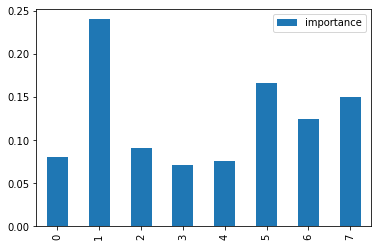

In [ ]:
importantfeat.plot.bar()

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(lr)

In [ ]:
rfe = rfe.fit(X_train,y_train)

In [ ]:
print(rfe.support_)

[ True False False False False  True  True  True]


In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
print(rfe.ranking_)

[1 2 3 4 5 1 1 1]
